In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline
# to vectorize the inline graphics
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
import seaborn as sns
from tqdm.autonotebook import tqdm

In [2]:
df=pd.read_csv('./content/drive/My Drive/mlp/questions.csv')
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
si=len(df)
si

404351

In [5]:
ans=df.groupby('is_duplicate')['id'].count()

In [6]:
print("percentage of simialar question pairs: ",(round(ans[0]/si,2))*100,"%")
print("percentage of dissimilar question pairs: ",(round(ans[1]/si,2))*100,"%")

percentage of simialar question pairs:  63.0 %
percentage of dissimilar question pairs:  37.0 %


In [7]:
bo=df[df.duplicated()]
len(bo)

0

<p> There are no duplicates </p> 

In [8]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Total no of unique questions:",len(np.unique(qid)))

Total no of unique questions: 789801


In [9]:
uni=qid.value_counts()
print(uni)

65333     50
7863      47
147324    41
2628      28
196396    26
          ..
530739     1
530741     1
530743     1
530745     1
789801     1
Length: 789801, dtype: int64


In [10]:
len(uni)

789801

[]

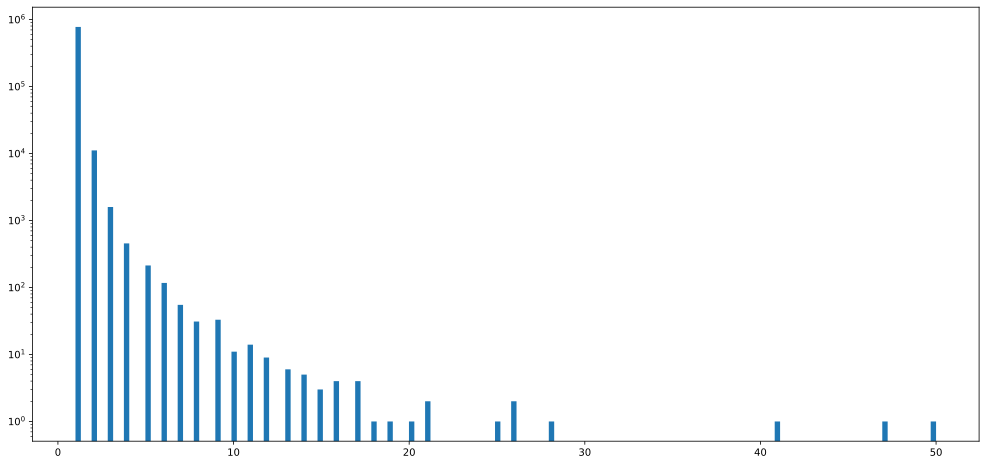

In [11]:
plt.figure(figsize=(17, 8))
plt.hist(uni,bins=160)
plt.yscale('log')
plt.plot()

Check for null values


In [12]:
row=df[df.isnull().any(axis=1)]   
row

id    qid1    qid2                         question1  \
105796  105796  209841  209842    How can I develop android app?   
201871  201871  398348  398349  How can I create an Android app?   
363416  363416  711434  711435                               NaN   

                                                question2  is_duplicate  
105796                                                NaN             0  
201871                                                NaN             0  
363416  My Chinese name is Haichao Yu. What English na...             0

In [13]:
df = df.fillna('')
ro=df[df.isnull().any(axis=1)]
ro

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []

<h1> <b>Adding some Basic Features</b> </h1>

- **frequency of occurance questions**

In [14]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2']=df.groupby('qid2')['qid2'].transform('count')

- **length of questions**

In [15]:
df['q1_len']=df['question1'].transform(func =lambda s: len(s))
df['q2_len']=df['question2'].transform(func=lambda s: len(s))

- **count of words in each question**

In [16]:
df['q1_wordscount']=df['question1'].transform(func=lambda s:len(s.split(" ")))
df['q2_wordscount']=df['question2'].transform(func=lambda s:len(s.split(" ")))

- **count of common words between queston 1 and question 2**

In [17]:
def word_common(row):
  q1=row['question1'].lower()
  q2=row['question2'].lower()
  q1=set(q1.split(" "))
  q2=set(q2.split(" "))
  return len(q1&q2)
df['common_words_count']=df.apply(word_common,axis=1)


- **total word count**

In [18]:
def cou(row):
  return len(set(row['question1'].split()))+len(set(row['question2'].split()))
df['tot_words']=df.apply(cou,axis=1)

- **words ratio =(common_words_count/tot_words)**

In [19]:
def rati(row):
  return row['common_words_count']/row['tot_words']
df['words_ratio']=df.apply(rati,axis=1)

- **total frequency of question 1 and question 2 add_freq=freq_qid1+freq_qid2**

In [20]:
def addfreq(row):
  return (row['freq_qid1']+row['freq_qid2'])
df['add_freq']=df.apply(addfreq,axis=1)


- **subraction of frequency of question 1 and question 2 sub_freq=abs(freq_qid1-freq_qid2)**

In [21]:
df['sub_freq']=df.apply(lambda row:abs(row['freq_qid1']-row['freq_qid2']),axis=1)


In [22]:
df

id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404346  404346  789792  789793   
404347  404347  789794  789795   
404348  404348  789796  789797   
404349  404349  789798  789799   
404350  404350  789800  789801   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404346  How many keywords are there in the Racket prog...   
404347          Do you believe there is life after death?   
404348                                  What is one coin?   
404349  What is the approx annual cost of living while...   
404350              What is like to have sex with cousin?   

                                                question2  is_duplicate  \
0       What is the step by step guide to invest in sh...             0   
1       What would happen if the Indian government sto...             0   
2       How can Internet speed be increased by hacking...             0   
3       Find the remainder when [math]23^{24}[/math] i...             0   
4                 Which fish would survive in salt water?             0   
...                                                   ...           ...   
404346  How many keywords are there in PERL Programmin...             0   
404347         Is it true that there is life after death?             1   
404348                                  What's this coin?             0   
404349  I am having little hairfall problem but I want...             0   
404350      What is it like to have sex with your cousin?             0   

        freq_qid1  freq_qid2  q1_len  q2_len  q1_wordscount  q2_wordscount  \
0               1          1      66      57             14             12   
1               1          1      51      88              8             13   
2               1          1      73      59             14             10   
3               1          1      50      65             11              9   
4               1          1      76      39             13              7   
...           ...        ...     ...     ...            ...            ...   
404346          1          1      85      79             14             13   
404347          1          1      41      42              8              9   
404348          1          1      17      17              4              3   
404349          1          1      94     127             17             25   
404350          1          1      37      45              8             10   

        common_words_count  tot_words  words_ratio  add_freq  sub_freq  
0                       10         23     0.434783         2         0  
1                        4         20     0.200000         2         0  
2                        4         24     0.166667         2         0  
3                        0         19     0.000000         2         0  
4                        2         20     0.100000         2         0  
...                    ...        ...          ...       ...       ...  
404346                  11         25     0.440000         2         0  
404347                   5         17     0.294118         2         0  
404348                   1          7     0.142857         2         0  
404349                   1         40     0.025000         2         0  
404350                   8         18     0.444444         2         0  

[404351 rows x 17 columns]

**<h1> Feature Analysis </h1>**

In [23]:
import seaborn as sns
def plo(var1,var2):
  plt.figure(figsize=(12,8))
  plt.subplot(1,2,1)
  sns.violinplot(x=var1,y=var2,data=df)
  plt.subplot(1,2,2)
  sns.displot(df[df[var1]==1][var2],label=1,color='red')
  sns.displot(df[df[var1]==0][var2],label=0,color='blue')
  plt.legend()
  plt.plot()



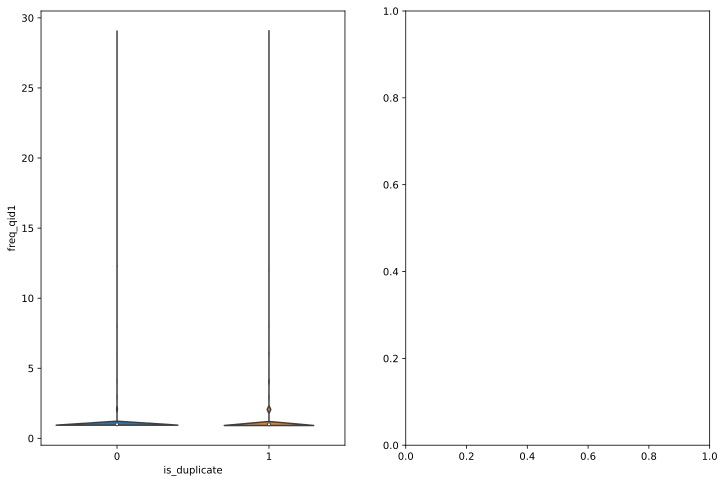

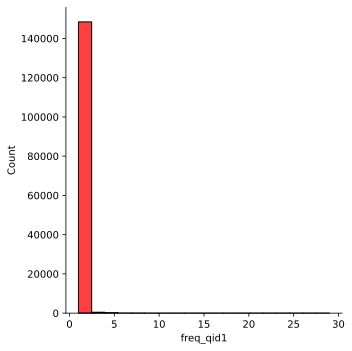

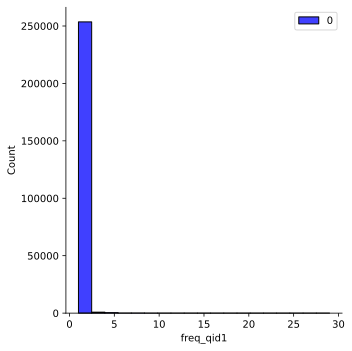

In [24]:
plo('is_duplicate','freq_qid1')

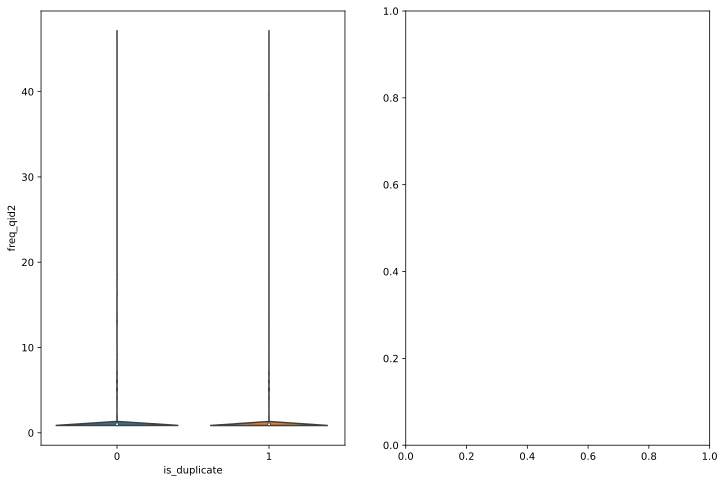

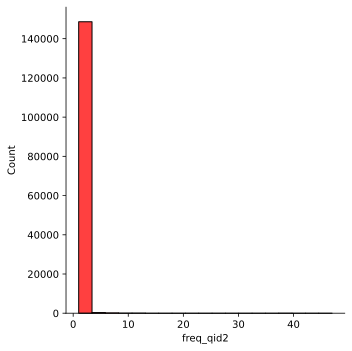

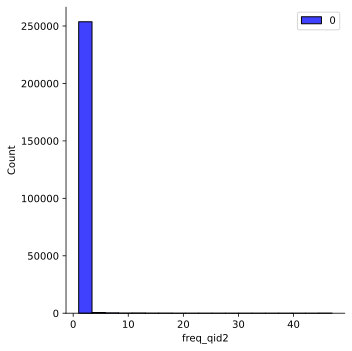

In [25]:
plo('is_duplicate','freq_qid2')

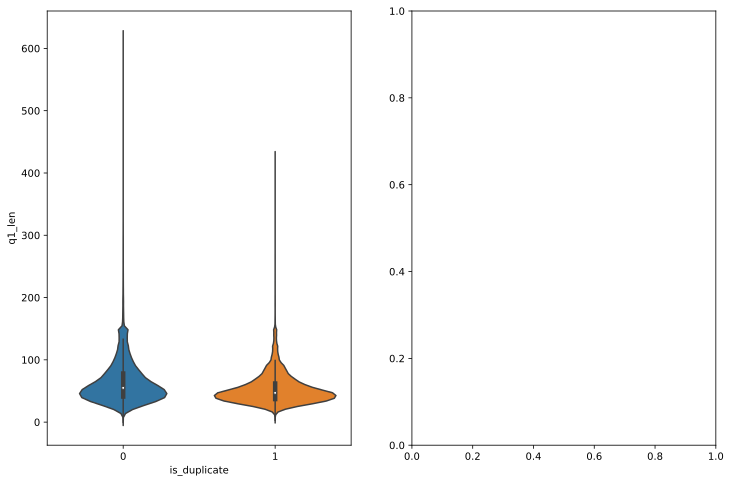

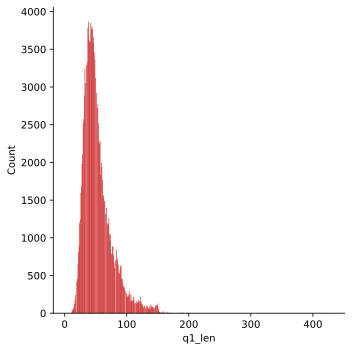

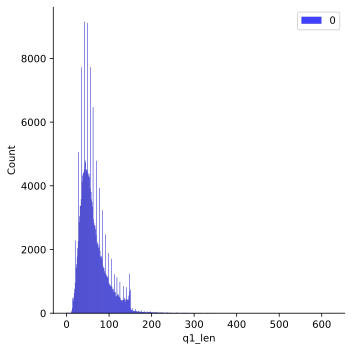

In [26]:
plo('is_duplicate','q1_len')

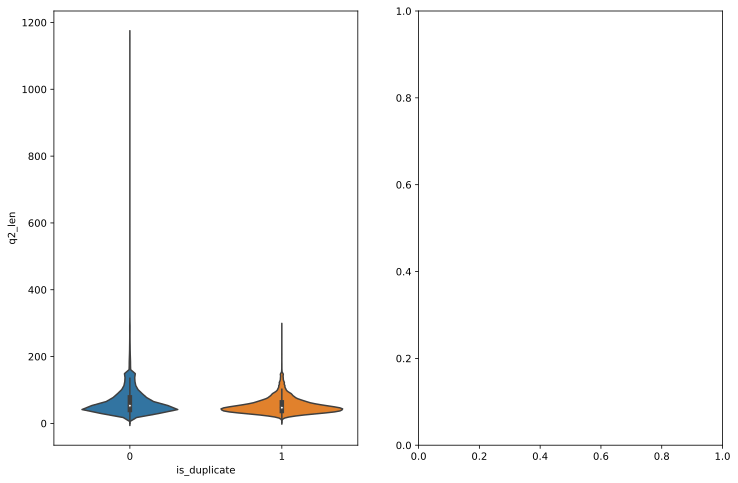

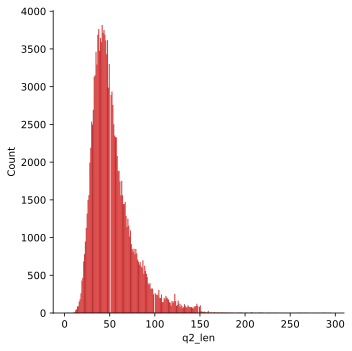

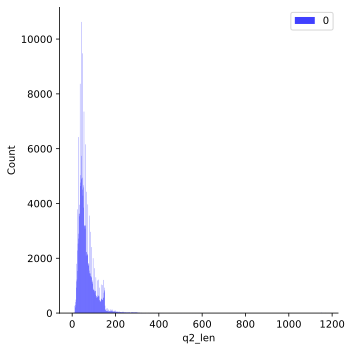

In [27]:
plo('is_duplicate','q2_len')

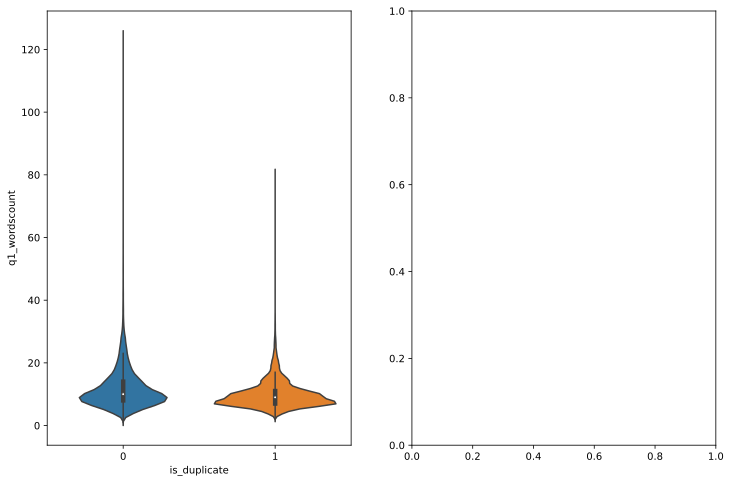

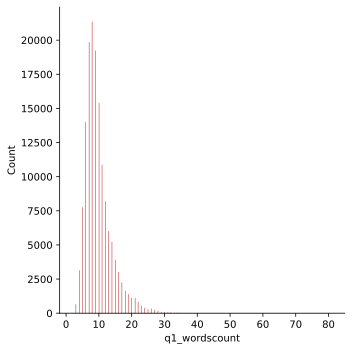

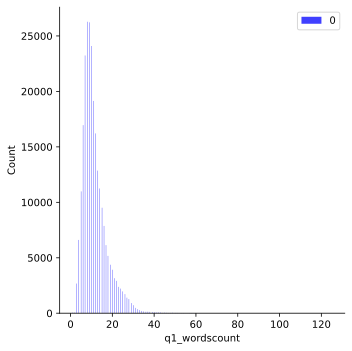

In [28]:
plo('is_duplicate','q1_wordscount')

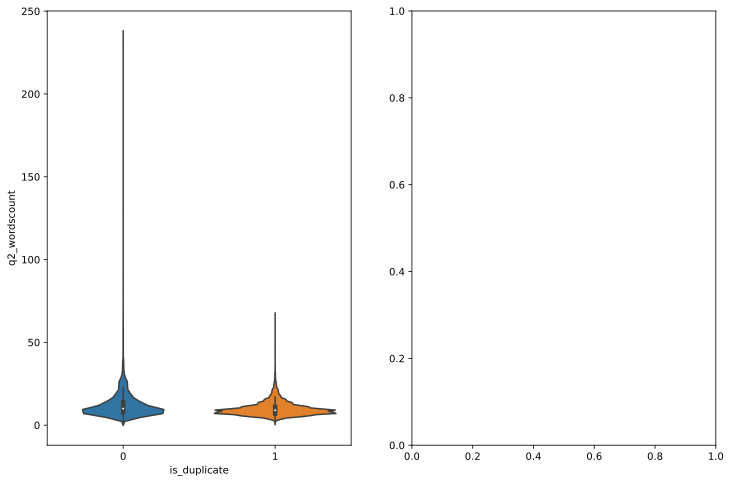

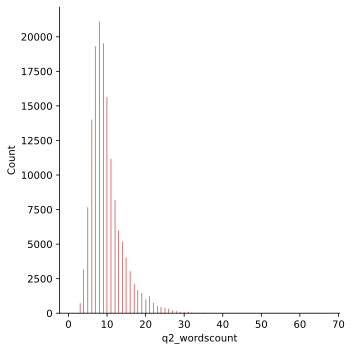

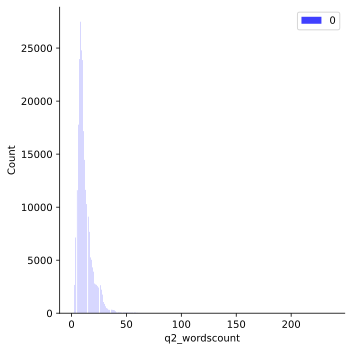

In [29]:
plo('is_duplicate','q2_wordscount')

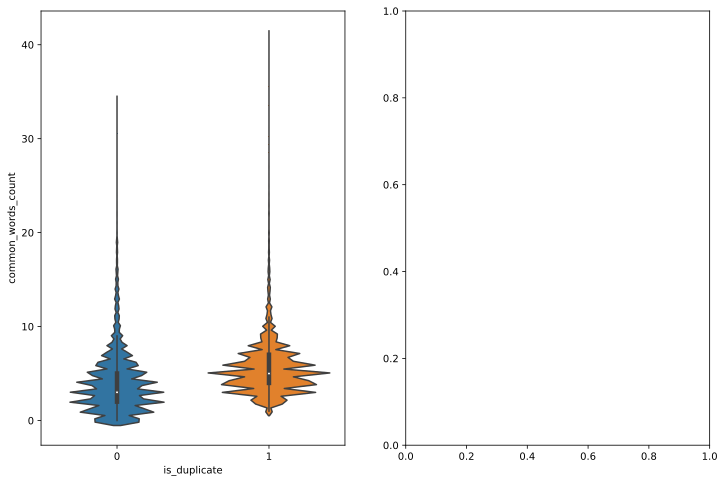

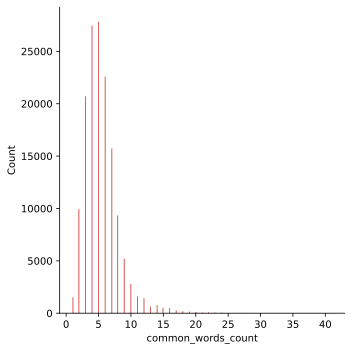

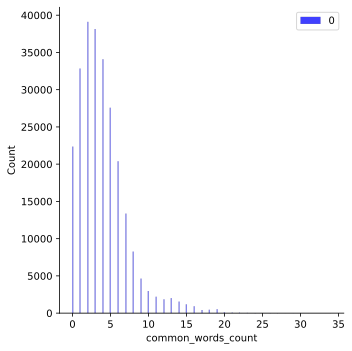

In [30]:
plo('is_duplicate','common_words_count')

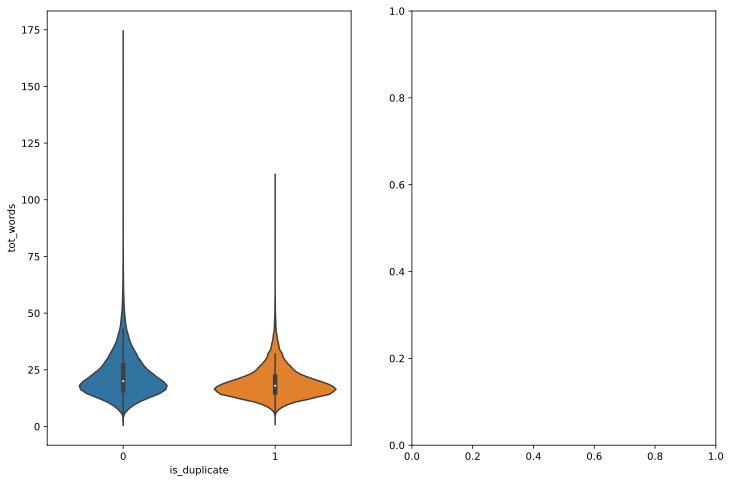

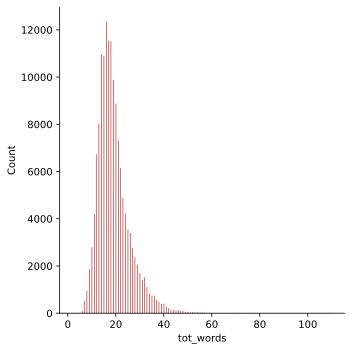

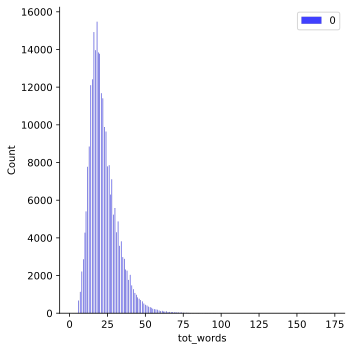

In [31]:
plo('is_duplicate','tot_words')

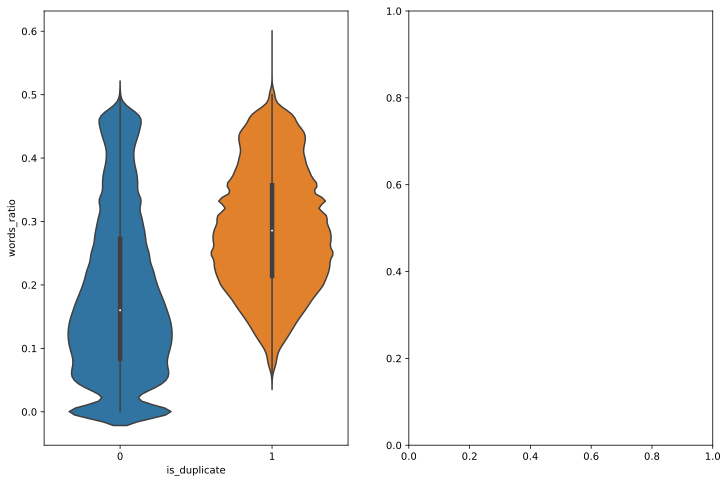

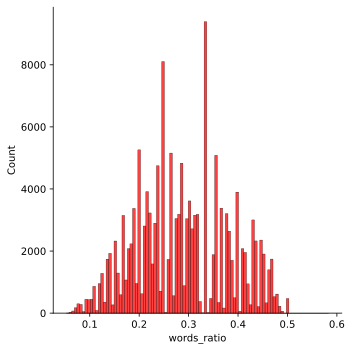

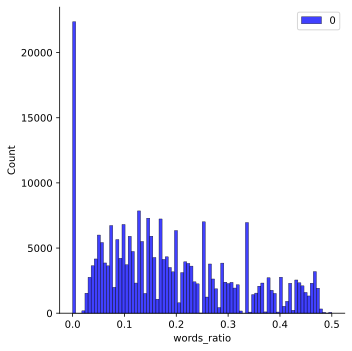

In [32]:
plo('is_duplicate','words_ratio')

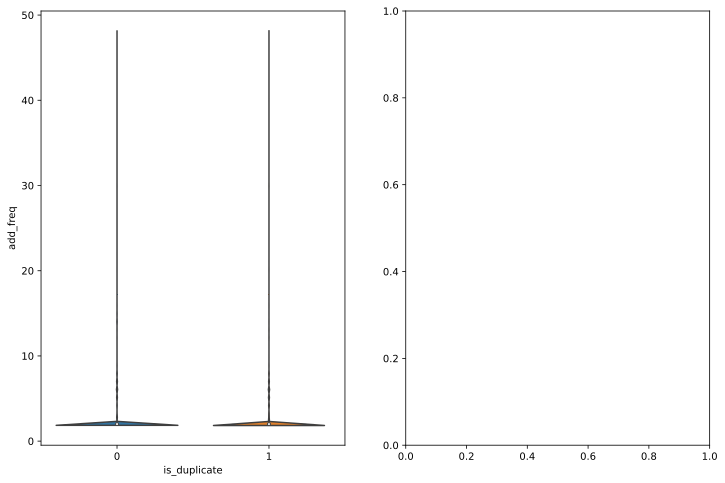

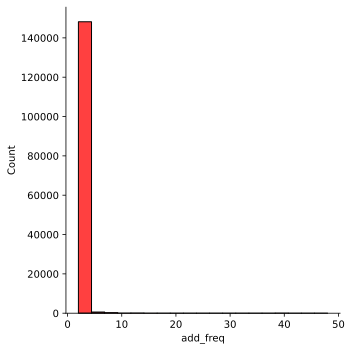

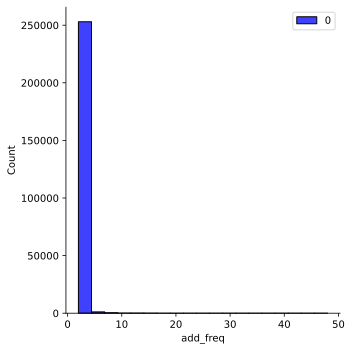

In [33]:
plo('is_duplicate','add_freq')

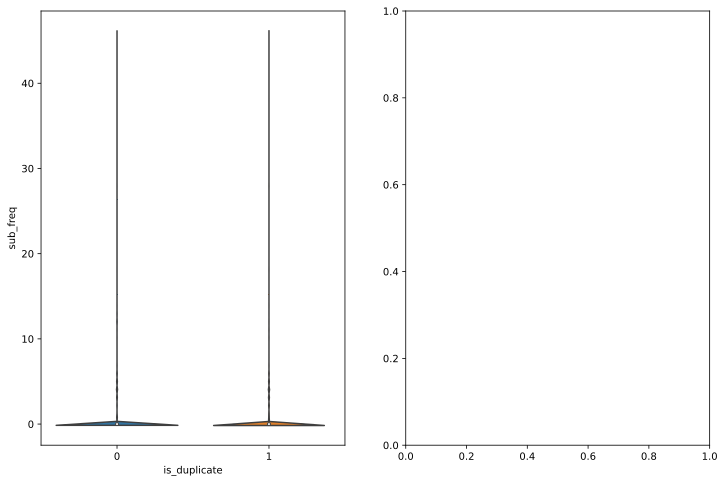

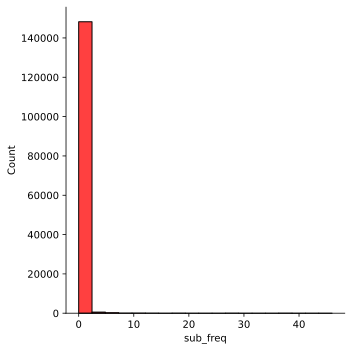

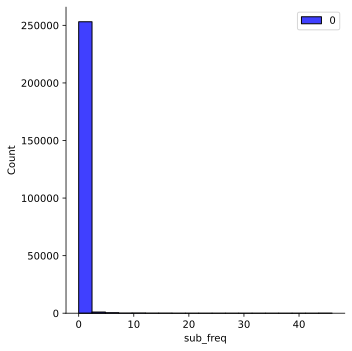

In [34]:
plo('is_duplicate','sub_freq')

In [35]:
df[df.isnull().any(axis = 1)]

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate, freq_qid1, freq_qid2, q1_len, q2_len, q1_wordscount, q2_wordscount, common_words_count, tot_words, words_ratio, add_freq, sub_freq]
Index: []

In [36]:
df

id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404346  404346  789792  789793   
404347  404347  789794  789795   
404348  404348  789796  789797   
404349  404349  789798  789799   
404350  404350  789800  789801   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404346  How many keywords are there in the Racket prog...   
404347          Do you believe there is life after death?   
404348                                  What is one coin?   
404349  What is the approx annual cost of living while...   
404350              What is like to have sex with cousin?   

                                                question2  is_duplicate  \
0       What is the step by step guide to invest in sh...             0   
1       What would happen if the Indian government sto...             0   
2       How can Internet speed be increased by hacking...             0   
3       Find the remainder when [math]23^{24}[/math] i...             0   
4                 Which fish would survive in salt water?             0   
...                                                   ...           ...   
404346  How many keywords are there in PERL Programmin...             0   
404347         Is it true that there is life after death?             1   
404348                                  What's this coin?             0   
404349  I am having little hairfall problem but I want...             0   
404350      What is it like to have sex with your cousin?             0   

        freq_qid1  freq_qid2  q1_len  q2_len  q1_wordscount  q2_wordscount  \
0               1          1      66      57             14             12   
1               1          1      51      88              8             13   
2               1          1      73      59             14             10   
3               1          1      50      65             11              9   
4               1          1      76      39             13              7   
...           ...        ...     ...     ...            ...            ...   
404346          1          1      85      79             14             13   
404347          1          1      41      42              8              9   
404348          1          1      17      17              4              3   
404349          1          1      94     127             17             25   
404350          1          1      37      45              8             10   

        common_words_count  tot_words  words_ratio  add_freq  sub_freq  
0                       10         23     0.434783         2         0  
1                        4         20     0.200000         2         0  
2                        4         24     0.166667         2         0  
3                        0         19     0.000000         2         0  
4                        2         20     0.100000         2         0  
...                    ...        ...          ...       ...       ...  
404346                  11         25     0.440000         2         0  
404347                   5         17     0.294118         2         0  
404348                   1          7     0.142857         2         0  
404349                   1         40     0.025000         2         0  
404350                   8         18     0.444444         2         0  

[404351 rows x 17 columns]

In [37]:
# df.to_pickle("./content/drive/My Drive/mlp/basic_features.pkl")
# df = pd.read_pickle("./content/drive/My Drive/mlp/basic_features.pkl")

**<h1>Preprocessing the text data</h1>**
- Stemming words in sentence 
- removing stop words
- Expanding Contractions
- lowering the casese


In [38]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from tqdm.autonotebook import tqdm

porter=PorterStemmer()

In [39]:
def replac(x):
  x=x.replace("$","dollar")
  x=x.replace("€","euro")
  x=x.replace("₹","rupee")
  x=x.replace("¥","yen")
  x=x.replace("£","pound")
  x=x.replace("%","percent")
  x=x.replace("&","and")
  x=x.replace("'ll"," will")
  x=x.replace(","," ")
  x=x.replace("?"," ")
  x=x.replace("i'm","i am")
  x=x.replace("'s"," is")
  x=x.replace("'ve"," have")
  x=x.replace("won't","will not")
  x=x.replace("can't","can not")
  x=x.replace("n't"," not")
  x=x.replace(",000","k")
  x=x.replace("000,000","m")
  x=x.replace("000,000,000","b")
  x=x.replace("."," ")
  return x;

def preprocessing(x):
  x=x.lower()
  x=replac(x)
  x=BeautifulSoup(x)
  x=x.get_text()
  lis=x.split()
  
  st=""
  for word in lis:
    st+=porter.stem(word)
    st+=" "
  x=st;
  return x;

In [40]:
tqdm.pandas()
df['question1']=df['question1'].progress_apply(preprocessing)
df['question2']=df['question2'].progress_apply(preprocessing)


100%|██████████| 404351/404351 [02:39<00:00, 2533.67it/s]


In [41]:
df

id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404346  404346  789792  789793   
404347  404347  789794  789795   
404348  404348  789796  789797   
404349  404349  789798  789799   
404350  404350  789800  789801   

                                                question1  \
0       what is the step by step guid to invest in sha...   
1       what is the stori of kohinoor (koh-i-noor) dia...   
2       how can i increas the speed of my internet con...   
3            whi am i mental veri lone how can i solv it    
4       which one dissolv in water quikli sugar salt m...   
...                                                   ...   
404346  how mani keyword are there in the racket progr...   
404347           do you believ there is life after death    
404348                                  what is one coin    
404349  what is the approx annual cost of live while s...   
404350              what is like to have sex with cousin    

                                                question2  is_duplicate  \
0       what is the step by step guid to invest in sha...             0   
1       what would happen if the indian govern stole t...             0   
2       how can internet speed be increas by hack thro...             0   
3       find the remaind when [math]23^{24}[/math] is ...             0   
4                  which fish would surviv in salt water              0   
...                                                   ...           ...   
404346  how mani keyword are there in perl program lan...             0   
404347         is it true that there is life after death              1   
404348                                  what is thi coin              0   
404349  i am have littl hairfal problem but i want to ...             0   
404350      what is it like to have sex with your cousin              0   

        freq_qid1  freq_qid2  q1_len  q2_len  q1_wordscount  q2_wordscount  \
0               1          1      66      57             14             12   
1               1          1      51      88              8             13   
2               1          1      73      59             14             10   
3               1          1      50      65             11              9   
4               1          1      76      39             13              7   
...           ...        ...     ...     ...            ...            ...   
404346          1          1      85      79             14             13   
404347          1          1      41      42              8              9   
404348          1          1      17      17              4              3   
404349          1          1      94     127             17             25   
404350          1          1      37      45              8             10   

        common_words_count  tot_words  words_ratio  add_freq  sub_freq  
0                       10         23     0.434783         2         0  
1                        4         20     0.200000         2         0  
2                        4         24     0.166667         2         0  
3                        0         19     0.000000         2         0  
4                        2         20     0.100000         2         0  
...                    ...        ...          ...       ...       ...  
404346                  11         25     0.440000         2         0  
404347                   5         17     0.294118         2         0  
404348                   1          7     0.142857         2         0  
404349                   1         40     0.025000         2         0  
404350                   8         18     0.444444         2         0  

[404351 rows x 17 columns]

In [42]:
# df.to_pickle("/content/drive/My Drive/mlp/preprocessing.pkl")
# df=pd.read_pickle("/content/drive/My Drive/mlp/preprocessing.pkl")

<h1> Adding NLP and Fuzzy Based Features </h1>


In [43]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thanmaisahith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
stop_words=stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- cwcmin=common word count/min(no of words in q1,no of words in q2)

In [45]:
tqdm.pandas()
def cwc_min_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  que1_words=set(que1).difference(set(stop_words))
  que2_words=set(que2).difference(set(stop_words))
  common_words=que1_words.intersection(que2_words)
  return len(common_words)/(min(len(que1_words),len(que2_words))+0.0001)

df['cwc_min']=df.progress_apply(cwc_min_cal,axis=1)

100%|██████████| 404351/404351 [00:11<00:00, 35619.41it/s]


- cwcmax=common word count/max(no of words in q1,no of words in q2)

In [46]:
tqdm.pandas()
def cwc_max_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  que1_words=set(que1).difference(set(stop_words))
  que2_words=set(que2).difference(set(stop_words))
  common_words=que1_words.intersection(que2_words)
  return len(common_words)/(max(len(que1_words),len(que2_words))+0.0001)

df['cwc_max']=df.progress_apply(cwc_max_cal,axis=1)

100%|██████████| 404351/404351 [00:11<00:00, 34875.41it/s]


- cscmin= common stop word count/min(no of stop words in q1,no of stop words in q2)

In [47]:
tqdm.pandas()
def csc_min_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  que1_stop_words=set(que1).intersection(set(stop_words))
  que2_stop_words=set(que2).intersection(set(stop_words))
  common_stop_words=que1_stop_words.intersection(que2_stop_words)
  return len(common_stop_words)/(min(len(que1_stop_words),len(que2_stop_words))+0.0001)
df['csc_min']=df.progress_apply(csc_min_cal,axis=1)

100%|██████████| 404351/404351 [00:11<00:00, 35885.91it/s]


- cscmax= common stop word count/max(no of stop words in q1,no of stop words in q2)

In [48]:
tqdm.pandas()
def csc_max_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  que1_stop_words=set(que1).intersection(set(stop_words))
  que2_stop_words=set(que2).intersection(set(stop_words))
  common_stop_words=que1_stop_words.intersection(que2_stop_words)
  return len(common_stop_words)/(max(len(que1_stop_words),len(que2_stop_words))+0.0001)
df['csc_max']=df.progress_apply(csc_max_cal,axis=1)

100%|██████████| 404351/404351 [00:11<00:00, 34399.76it/s]


- ctcmin=common token count/min(no of tokens in q1,no of tokens in q2)

In [49]:
tqdm.pandas()
def ctc_min_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  common_token=set(que1).intersection(set(que2))
  return len(common_token)/(min(len(que1),len(que2))+0.0001)
df['ctc_min']=df.progress_apply(ctc_min_cal,axis=1)

100%|██████████| 404351/404351 [00:07<00:00, 53334.18it/s]


- ctcmax=common token count/max(no of tokens in q1,no of tokens in q2)

In [50]:
tqdm.pandas()
def ctc_max_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  common_token=set(que1).intersection(set(que2))
  return len(common_token)/(max(len(que1),len(que2))+0.0001)
df['ctc_max']=df.progress_apply(ctc_max_cal,axis=1)

100%|██████████| 404351/404351 [00:07<00:00, 51146.34it/s]


- first_word_equal= 1 if first word of both questions are equal else 0

In [51]:
tqdm.pandas()
def fir_word_eq_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  if(len(que1)==0 or len(que2)==0):
    return 0.0
  if(que1[0]==que2[0]):
    return 1.0;
  else:
    return 0.0;
df['fir_word_eq']=df.progress_apply(fir_word_eq_cal,axis=1)

100%|██████████| 404351/404351 [00:07<00:00, 53819.98it/s]


- last_word_equal= 1 if last word of both questions are equal else 0

In [52]:
tqdm.pandas()
def las_word_eq_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  if(len(que1)==0 or len(que2)==0):
    return 0.0
  if(que1[len(que1)-1]==que2[len(que2)-1]):
    return 1.0;
  else:
    return 0.0;
df['las_word_eq']=df.progress_apply(las_word_eq_cal,axis=1)

100%|██████████| 404351/404351 [00:06<00:00, 64741.82it/s]


- absdiff_tokens=abs(no of tokens in q1- no of tokens in q2)

In [53]:
tqdm.pandas()
def absdiff_token_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  return abs(len(que1)-len(que2))
df['absdiff_token']=df.progress_apply(absdiff_token_cal,axis=1)

100%|██████████| 404351/404351 [00:06<00:00, 63934.88it/s]


- mean_token = average (tokens of q1,tokens of q2)

In [54]:
tqdm.pandas()
def mean_token_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  return (len(que1)+len(que2))/2

df['mean_token']=df.progress_apply(mean_token_cal,axis=1)

100%|██████████| 404351/404351 [00:06<00:00, 63450.82it/s]


<h3> fuzzy Logic feature </h3>

- fuzz_ratio

In [55]:
%pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [56]:
from fuzzywuzzy import fuzz

/Users/thanmaisahith/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [57]:
tqdm.pandas()
def fuzz_ratio_cal(row):
  return fuzz.ratio(row['question1'],row['question2'])

df['fuzz_ratio']=df.progress_apply(fuzz_ratio_cal,axis=1)

100%|██████████| 404351/404351 [01:28<00:00, 4562.56it/s]


- fuzz_partial_ratio


In [58]:
tqdm.pandas()
def fuzz_partial_ratio_cal(row):
  return fuzz.partial_ratio(row['question1'],row['question2'])
df['fuzz_partial_ratio']=df.progress_apply(fuzz_partial_ratio_cal,axis=1)


100%|██████████| 404351/404351 [10:29<00:00, 642.74it/s]


- fuzz_sort_ratio

In [59]:
tqdm.pandas()
def fuzz_sort_ratio_cal(row):
  return fuzz.token_sort_ratio(row['question1'],row['question2'])
df['fuzz_sort_ratio']=df.progress_apply(fuzz_sort_ratio_cal,axis=1)


100%|██████████| 404351/404351 [01:39<00:00, 4059.35it/s]


- fuzz_set_ratio

In [60]:
tqdm.pandas()
def fuzz_set_ratio_cal(row):
  return fuzz.token_set_ratio(row['question1'],row['question2'])
df['fuzz_set_ratio']=df.progress_apply(fuzz_set_ratio_cal,axis=1)


100%|██████████| 404351/404351 [02:15<00:00, 2984.95it/s]


- Longest common subsequence ratio



In [61]:
%pip install distance

Note: you may need to restart the kernel to use updated packages.


In [62]:
import distance
tqdm.pandas()
def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)
df["lcs_ratio"]  = df.progress_apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)


100%|██████████| 404351/404351 [05:02<00:00, 1337.26it/s]


In [63]:
df.head(1)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guid to invest in sha...   

                                           question2  is_duplicate  freq_qid1  \
0  what is the step by step guid to invest in sha...             0          1   

   freq_qid2  q1_len  q2_len  ...   ctc_max  fir_word_eq  las_word_eq  \
0          1      66      57  ...  0.785709          1.0          0.0   

   absdiff_token  mean_token  fuzz_ratio  fuzz_partial_ratio  fuzz_sort_ratio  \
0              2        13.0          93                 100               92   

   fuzz_set_ratio  lcs_ratio  
0             100   0.982456  

[1 rows x 32 columns]

In [64]:
# df.to_pickle("/content/drive/My Drive/mlp/advanced_features.pkl")


In [65]:
# df=pd.read_pickle("/content/drive/My Drive/mlp/advanced_features.pkl")

<h1> Fuzzy Feature Analysis </h1>

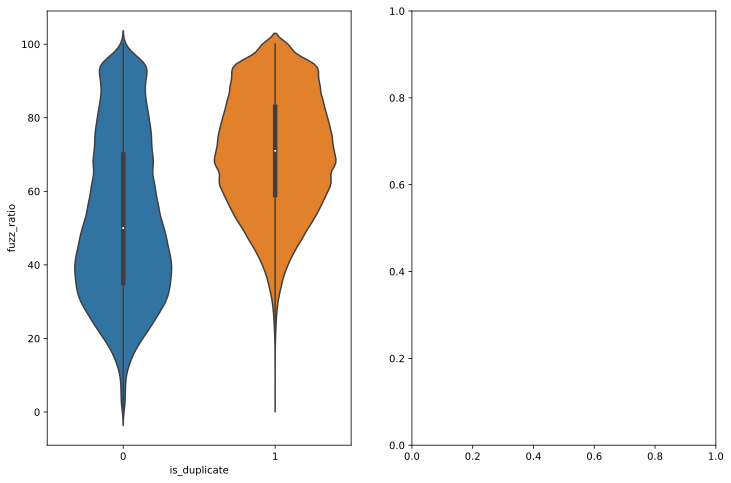

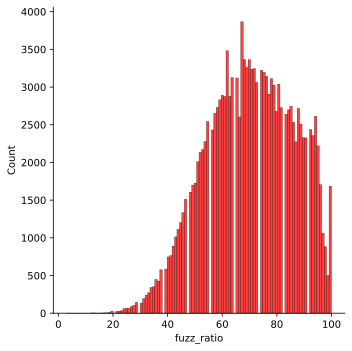

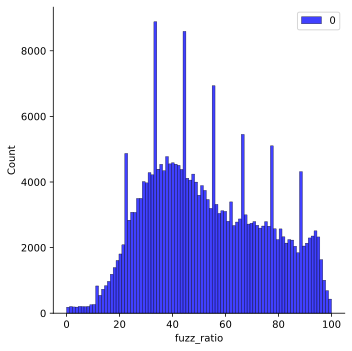

In [66]:
plo('is_duplicate','fuzz_ratio')

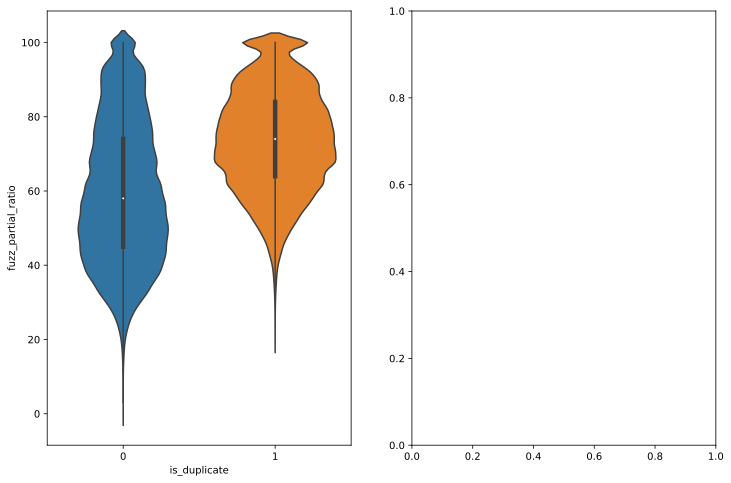

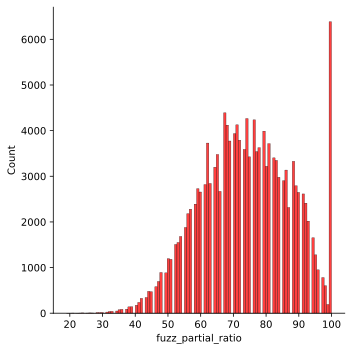

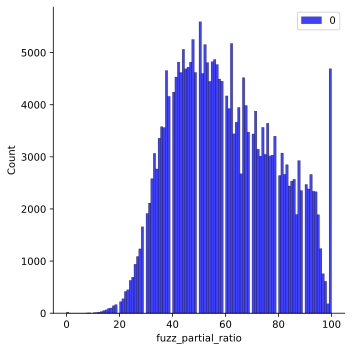

In [67]:
plo('is_duplicate','fuzz_partial_ratio')

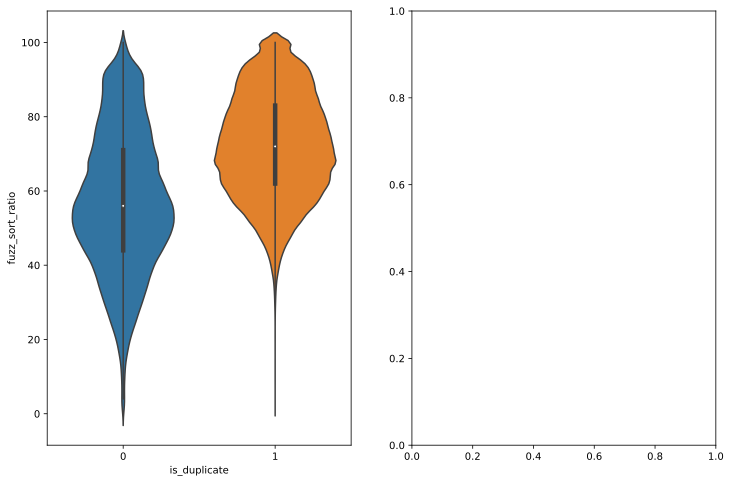

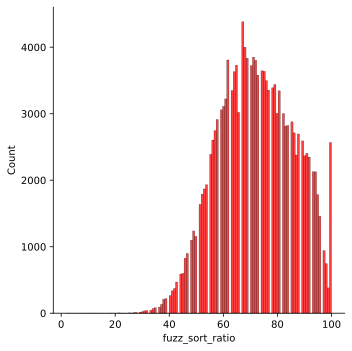

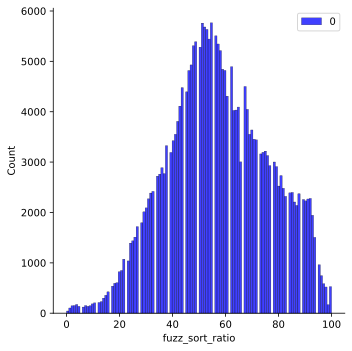

In [68]:
plo('is_duplicate','fuzz_sort_ratio')

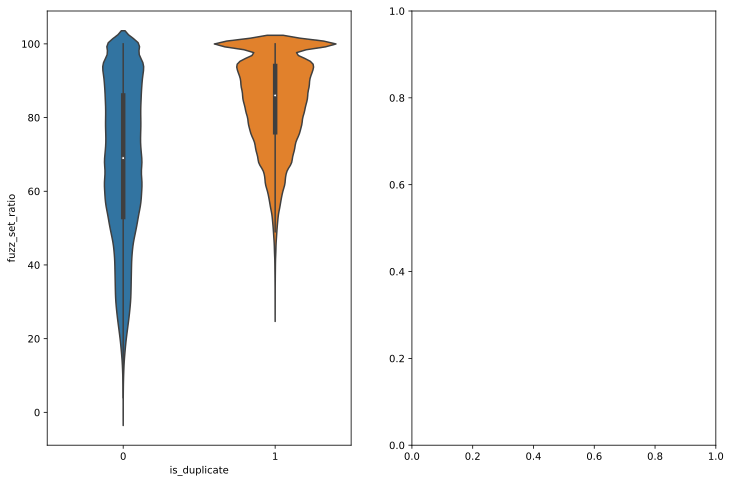

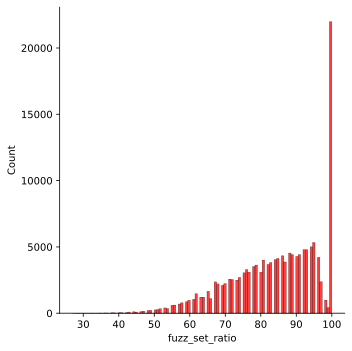

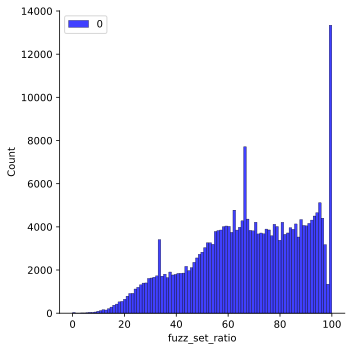

In [69]:
plo('is_duplicate','fuzz_set_ratio')

<h1> Pair Plot of Natural language Processing features </h1>


In [193]:
fea=['ctc_min','ctc_max','cwc_min','cwc_max']
sns.pairplot(df[['ctc_min','ctc_max','cwc_min','cwc_max','is_duplicate']][:],hue='is_duplicate',vars=fea)
plt.show()

<h1> Plotting Word Cloud </h1>

In [70]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [71]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thanmaisahith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df_dup=df[df['is_duplicate']==1]
df_ndup =df[df['is_duplicate'] == 0]


In [73]:
du = np.dstack([df_dup["question1"], df_dup["question2"]]).flatten()
ndu = np.dstack([df_ndup["question1"], df_ndup["question2"]]).flatten()


In [74]:
strdu=" ".join(list(du))
strndu=" ".join(list(ndu))


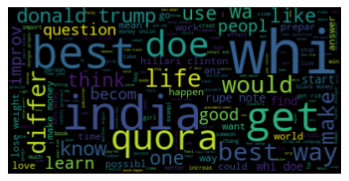

In [75]:
wc=WordCloud(stopwords=stop_words)
wc.generate(strdu)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show() 

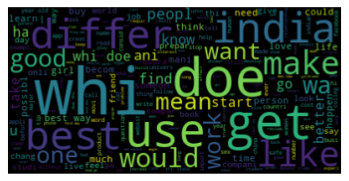

In [76]:
wc=WordCloud(stopwords=stop_words )
wc.generate(strndu)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1> visualization (TSNE) </h1>

In [77]:
df_sample=df[0:10000]
df_sample.head(1)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guid to invest in sha...   

                                           question2  is_duplicate  freq_qid1  \
0  what is the step by step guid to invest in sha...             0          1   

   freq_qid2  q1_len  q2_len  ...   ctc_max  fir_word_eq  las_word_eq  \
0          1      66      57  ...  0.785709          1.0          0.0   

   absdiff_token  mean_token  fuzz_ratio  fuzz_partial_ratio  fuzz_sort_ratio  \
0              2        13.0          93                 100               92   

   fuzz_set_ratio  lcs_ratio  
0             100   0.982456  

[1 rows x 32 columns]

In [78]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30,n_iter=1000)
tsne_df=pd.DataFrame(tsne.fit_transform(df_sample[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','las_word_eq','fir_word_eq','absdiff_token','mean_token','fuzz_ratio','fuzz_partial_ratio','fuzz_sort_ratio','fuzz_set_ratio','lcs_ratio']]),columns=['fea1','fea2'])
tsne_df['is_duplicate']=df_sample['is_duplicate']
tsne_df


fea1       fea2  is_duplicate
0     36.149185 -40.205494             0
1     10.161087  34.143589             0
2    -20.244555  -9.045537             0
3     -8.127854 -75.488449             0
4    -43.131367  -6.612576             0
...         ...        ...           ...
9995 -17.702898 -43.316257             0
9996   8.496196 -80.050674             0
9997 -15.347604 -42.073120             0
9998  33.292225  -0.216332             1
9999 -13.022735  62.204163             0

[10000 rows x 3 columns]

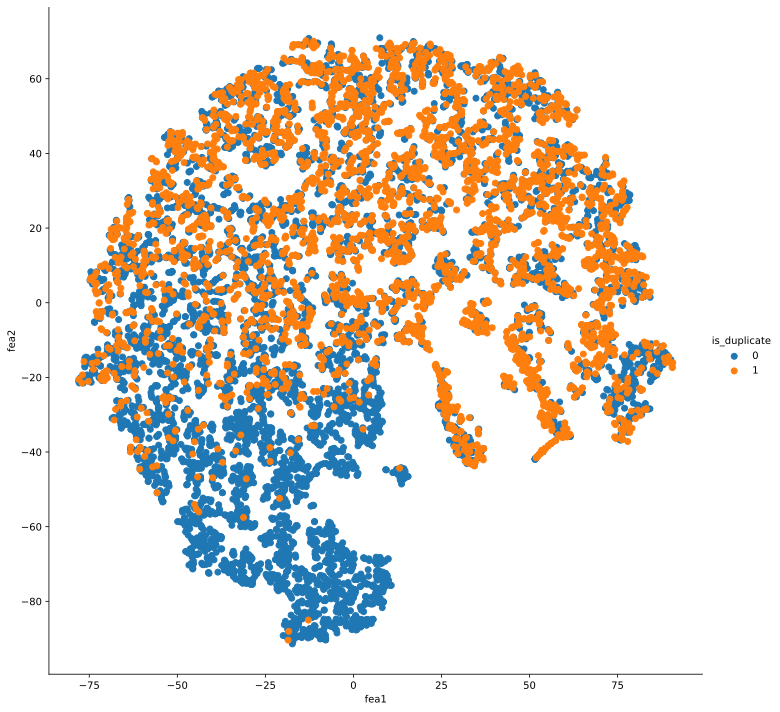

In [79]:
sns.FacetGrid(tsne_df, hue='is_duplicate',height=10).map(plt.scatter,"fea1","fea2").add_legend()
# plt.show()
plt.savefig('./content/drive/My Drive/mlp/tsne.svg')

<h1> Tfidf-word vector <h1>

In [80]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [81]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
ques=list(df['question1'])+list(df['question2'])
tfidf=TfidfVectorizer()
spar_mat=tfidf.fit_transform(ques)
idf_val=dict(zip(tfidf.get_feature_names(),tfidf.idf_))
len(idf_val)

73329

In [83]:
def nlp_pc(df, qn):
  nlp = spacy.load('en_core_web_sm')
  vectors = []
  qs = 'q'+qn[-1]+'_w2v_idf'
  print(qs)
  for question in tqdm(list(df[qn])):
    doc = nlp(question)
    try:
      vec=np.zeros([len(doc[0].vector)])
    except:
      vec=np.zeros(96)
    for word in doc:
      word_vec= word.vector
      try:
        idf =idf_val[str(word)]
      except:
        idf = 0
      vec += (word_vec* idf)
    vectors.append(vec)
  # qs = 'q'+qs[-1]+'_w2v_idf'
  # print(qs)
  df[qs] = list(vectors)

In [84]:
nlp_pc(df, 'question1')

q1_w2v_idf


100%|██████████| 404351/404351 [38:24<00:00, 175.45it/s]


In [85]:
df.to_pickle("./content/drive/My Drive/mlp/tfidfw2v_q1.pkl")

In [86]:
df=pd.read_pickle('./content/drive/My Drive/mlp/tfidfw2v_q1.pkl')

In [87]:
df

id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404346  404346  789792  789793   
404347  404347  789794  789795   
404348  404348  789796  789797   
404349  404349  789798  789799   
404350  404350  789800  789801   

                                                question1  \
0       what is the step by step guid to invest in sha...   
1       what is the stori of kohinoor (koh-i-noor) dia...   
2       how can i increas the speed of my internet con...   
3            whi am i mental veri lone how can i solv it    
4       which one dissolv in water quikli sugar salt m...   
...                                                   ...   
404346  how mani keyword are there in the racket progr...   
404347           do you believ there is life after death    
404348                                  what is one coin    
404349  what is the approx annual cost of live while s...   
404350              what is like to have sex with cousin    

                                                question2  is_duplicate  \
0       what is the step by step guid to invest in sha...             0   
1       what would happen if the indian govern stole t...             0   
2       how can internet speed be increas by hack thro...             0   
3       find the remaind when [math]23^{24}[/math] is ...             0   
4                  which fish would surviv in salt water              0   
...                                                   ...           ...   
404346  how mani keyword are there in perl program lan...             0   
404347         is it true that there is life after death              1   
404348                                  what is thi coin              0   
404349  i am have littl hairfal problem but i want to ...             0   
404350      what is it like to have sex with your cousin              0   

        freq_qid1  freq_qid2  q1_len  q2_len  ...  fir_word_eq  las_word_eq  \
0               1          1      66      57  ...          1.0          0.0   
1               1          1      51      88  ...          1.0          0.0   
2               1          1      73      59  ...          1.0          0.0   
3               1          1      50      65  ...          0.0          0.0   
4               1          1      76      39  ...          1.0          0.0   
...           ...        ...     ...     ...  ...          ...          ...   
404346          1          1      85      79  ...          1.0          1.0   
404347          1          1      41      42  ...          0.0          1.0   
404348          1          1      17      17  ...          1.0          1.0   
404349          1          1      94     127  ...          0.0          0.0   
404350          1          1      37      45  ...          1.0          1.0   

        absdiff_token  mean_token  fuzz_ratio  fuzz_partial_ratio  \
0                   2        13.0          93                 100   
1                   5        10.5          68                  73   
2                   4        12.0          42                  46   
3                   1        10.5          23                  27   
4                   6        10.0          37                  55   
...               ...         ...         ...                 ...   
404346              1        13.5          91                  86   
404347              1         8.5          73                  77   
404348              0         4.0          82                  82   
404349              8        21.0          33                  37   
404350              2         9.0          90                  86   

        fuzz_sort_ratio  fuzz_set_ratio  lcs_ratio  \
0                    92             100   0.982456   
1                    65              86   0.596154   
2                    64      

In [88]:
nlp_pc(df, 'question2')

q2_w2v_idf


100%|██████████| 404351/404351 [39:43<00:00, 169.67it/s] 


In [89]:
df.to_pickle("./content/drive/My Drive/mlp/tfidfw2v.pkl")
# df=pd.read_pickle("/content/drive/My Drive/mlp/tfidfw2v.pkl")

In [91]:
dfq1=pd.DataFrame((df['q1_w2v_idf'].values).tolist(),index=df.index,columns=["q1_"+str(i) for i in range(len(df['q1_w2v_idf'][0]))])
dfq2=pd.DataFrame((df['q2_w2v_idf'].values).tolist(),index=df.index,columns=["q2_"+str(i) for i in range(len(df['q2_w2v_idf'][0]))])
dfq1['id']=df.id
dfq2['id']=df.id
dfq1q2  = dfq1.merge(dfq2, on='id',how='left')
df=df.merge(dfq1q2,on='id',how='left')
df.drop(['id','q1_w2v_idf','q2_w2v_idf','qid1','qid2','question1','question2'],axis=1,inplace=True)

In [92]:
df.to_pickle("./content/drive/My Drive/mlp/final_df.pkl")

In [2]:
df=pd.read_pickle("./content/drive/My Drive/mlp/final_df.pkl")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './content/drive/My Drive/mlp/final_df.pkl'

In [94]:
x_label=df.iloc[:,1:]
y_label=df.iloc[:,0:1]

In [95]:
y_val=list(map(int,y_label.values))

<h1>Train Test Splitting in stratified Way</h1>

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_label,y_val,stratify=y_val,test_size=0.3)

<h1> Training a Random Model

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import log_loss

In [98]:
y_predict=np.zeros((len(y_test),2))
for i in range(len(y_test)):
    rand_val= np.random.rand(1,2)
    y_predict[i] = ((rand_val/sum(sum(rand_val)))[0])
#print(Y_predict)
print("Log loss on Test Data using Random Model",log_loss(y_test, y_predict, eps=1e-15))

Log loss on Test Data using Random Model 0.8842484728875052


In [99]:
y_predict=np.argmax(y_predict,axis=1)
conf_matrix = confusion_matrix(y_test,y_predict)


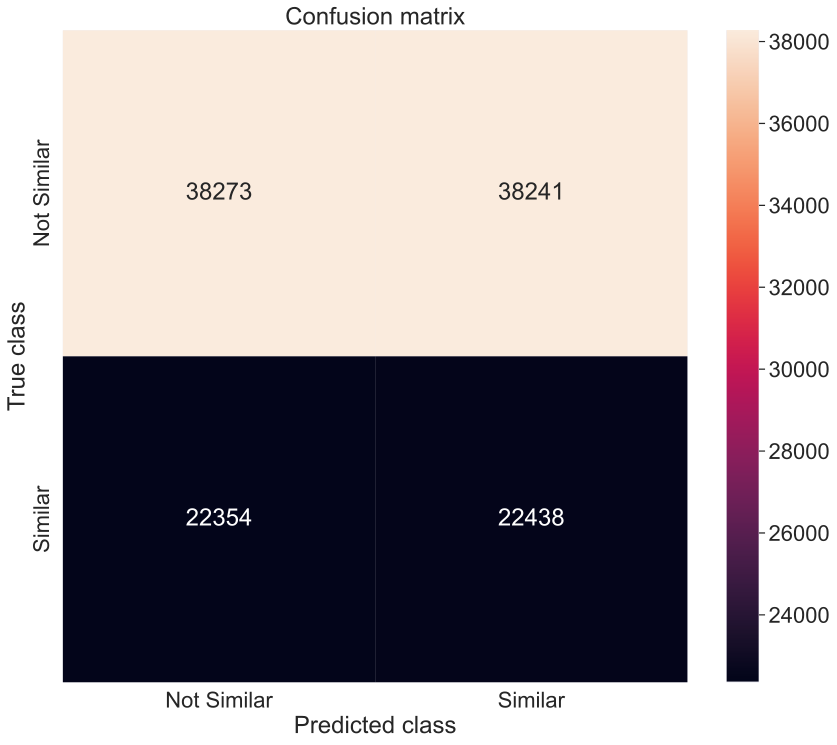

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2.0)
LABELS = ['Not Similar', 'Similar']
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
# plt.show()
plt.savefig('confusion_matrix.svg')

<h1> Logistic Regression </h1>


In [101]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [102]:
%pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [103]:
import joblib as jb
mi=100000
best_alpha=-1;
alpha=[10**i for i in range(-5,2)]
# initialise an empty data fram to store log-loss values for each alpha
lloss = []
for i in tqdm(alpha):
  model=SGDClassifier(alpha=i,random_state=42 ,loss='log') 
  #model.fit(x_train,y_train)
  sig_model=CalibratedClassifierCV(model,method='sigmoid')
  sig_model.fit(x_train,y_train)
  y_predict=sig_model.predict_proba(x_test)
  logloss=log_loss(y_test,y_predict)
  if(mi>logloss):
    mi=logloss
    best_alpha=i
  lloss.append(logloss)
  print("alpha->",i,"\t\tlog-loss->",logloss)

 14%|█▍        | 1/7 [12:13<1:13:23, 733.95s/it]

alpha-> 1e-05 		log-loss-> 0.5794053579188793


 29%|██▊       | 2/7 [25:39<1:04:40, 776.16s/it]

alpha-> 0.0001 		log-loss-> 0.5970878425411961


 43%|████▎     | 3/7 [31:14<38:18, 574.60s/it]  

alpha-> 0.001 		log-loss-> 0.5481803931269583


 57%|█████▋    | 4/7 [32:39<19:03, 381.19s/it]

alpha-> 0.01 		log-loss-> 0.522235423551046


 71%|███████▏  | 5/7 [33:04<08:25, 252.84s/it]

alpha-> 0.1 		log-loss-> 0.5276469545290171


 86%|████████▌ | 6/7 [33:18<02:51, 171.80s/it]

alpha-> 1 		log-loss-> 0.541862461975359


100%|██████████| 7/7 [33:29<00:00, 287.01s/it]

alpha-> 10 		log-loss-> 0.559025415755168


In [104]:
# square of alpha
alpha2=[i**2 for i in alpha]

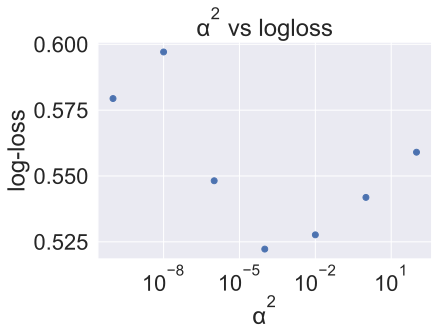

In [105]:
# alpha vs log-loss plot
plt.scatter(alpha2,lloss)
plt.xlabel("$\mathregular{α^{2}}$")
plt.ylabel("log-loss")
# specify scale of x-axis
plt.xscale('log')
plt.title("$\mathregular{α^{2}}$ vs logloss")
# scatter plot
# dimensions of the plot
# plt.rcParams["figure.figsize"] = (10,6)
plt.savefig('log-reg-ll.svg')

In [106]:
best_alpha=0.001

In [107]:
best_model=SGDClassifier(alpha=best_alpha,random_state=42,loss="log")
best_model=CalibratedClassifierCV(best_model,method="sigmoid")
best_model.fit(x_train,y_train)
jb.dump(best_model, './content/drive/My Drive/mlp/log_reg.gz')
y_predict=best_model.predict_proba(x_train)
print("Train Log Loss -->",log_loss(y_train,y_predict))
y_predict=best_model.predict_proba(x_test)
print("Test Log Loss -->",log_loss(y_test,y_predict))
y_predict=np.argmax(y_predict,axis=1)
confusion_matrix(y_test,y_predict)


Train Log Loss --> 0.5466897136589138
Test Log Loss --> 0.5481803931269583


array([[63201, 13313],
       [22275, 22517]])

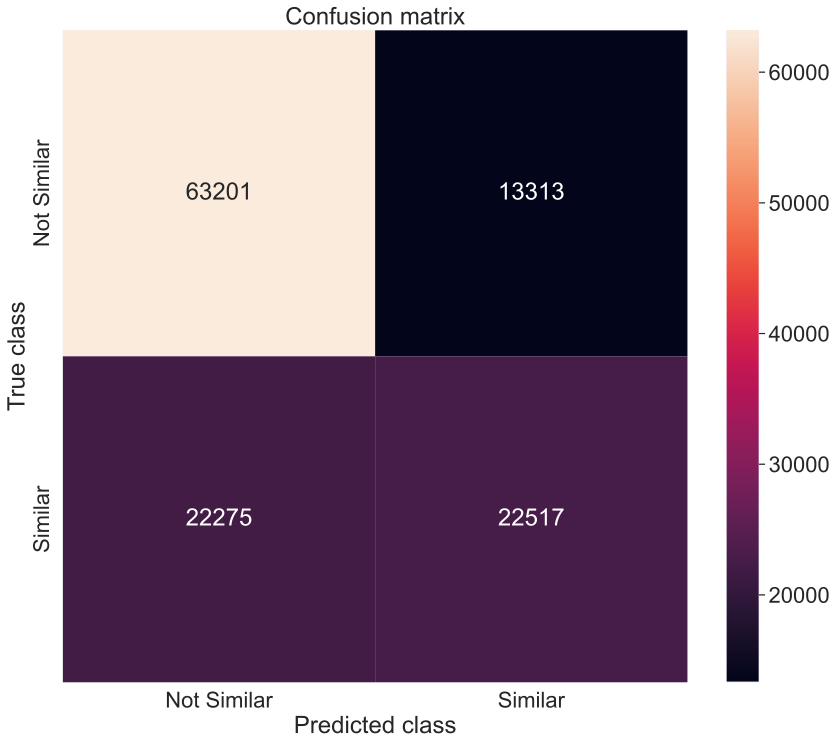

In [108]:
# heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix= confusion_matrix(y_test,y_predict)
sns.set(font_scale=2.0)
LABELS = ['Not Similar', 'Similar']
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
# plt.show()
plt.savefig('confusion_matrix_lr.svg')

<h1> SVM (Support Vector Machine) </h1>

In [109]:
accuracy_score(y_test, y_predict)

0.7066262179941635

In [110]:
mi=100000
best_alpha=-1;
alpha=[10**i for i in range(-5,2)]
lloss = []
for i in tqdm(alpha):
  model=SGDClassifier(alpha=i,random_state=42,loss="log")
  #model.fit(x_train,y_train)
  sig_model=CalibratedClassifierCV(model,method='sigmoid')
  sig_model.fit(x_train,y_train)
  y_predict=sig_model.predict_proba(x_test)
  logloss=log_loss(y_test,y_predict)
  if(mi>logloss):
    mi=logloss
    best_alpha=i
  lloss.append(logloss)
  print("alpha->",i,"\t\tlog-loss->",logloss)

 14%|█▍        | 1/7 [26:22<2:38:12, 1582.11s/it]

alpha-> 1e-05 		log-loss-> 0.5770555553063665


 29%|██▊       | 2/7 [35:58<1:22:33, 990.62s/it] 

alpha-> 0.0001 		log-loss-> 0.5867593053149223


 43%|████▎     | 3/7 [40:55<44:54, 673.71s/it]  

alpha-> 0.001 		log-loss-> 0.543443877877954


 57%|█████▋    | 4/7 [42:30<22:15, 445.27s/it]

alpha-> 0.01 		log-loss-> 0.5203671634342159


 71%|███████▏  | 5/7 [43:06<09:55, 297.66s/it]

alpha-> 0.1 		log-loss-> 0.5245561164118294


 86%|████████▌ | 6/7 [43:21<03:21, 201.69s/it]

alpha-> 1 		log-loss-> 0.5406023097303839


100%|██████████| 7/7 [43:31<00:00, 373.08s/it]

alpha-> 10 		log-loss-> 0.554181134367957


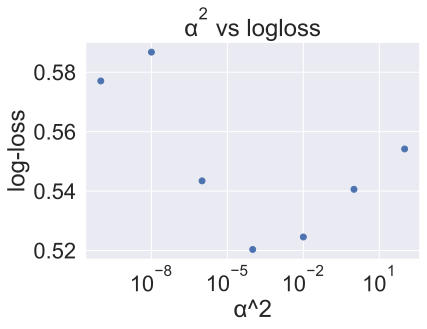

In [111]:
# alpha2 vs log-loss plot
alpha2 = [i**2 for i in alpha]
plt.scatter(alpha2,lloss)
plt.xlabel("α^2")
plt.ylabel("log-loss")
# specify scale of x-axis
plt.xscale('log')
plt.title("$\mathregular{α^{2}}$ vs logloss")
plt.savefig('svm-ll.svg')


In [112]:
best_model=SGDClassifier(alpha=best_alpha,random_state=42,loss="hinge")
best_model=CalibratedClassifierCV(best_model,method="sigmoid")
best_model.fit(x_train,y_train)
jb.dump(best_model, './content/drive/My Drive/mlp/svm.gz')
y_predict=best_model.predict_proba(x_train)
print("Train Log Loss -->",log_loss(y_train,y_predict))
y_predict=best_model.predict_proba(x_test)
print("Test Log Loss -->",log_loss(y_test,y_predict))
y_predict=np.argmax(y_predict,axis=1)
confusion_matrix(y_test,y_predict)

Train Log Loss --> 0.5176488472130534
Test Log Loss --> 0.5203671634342159


array([[62225, 14289],
       [19848, 24944]])

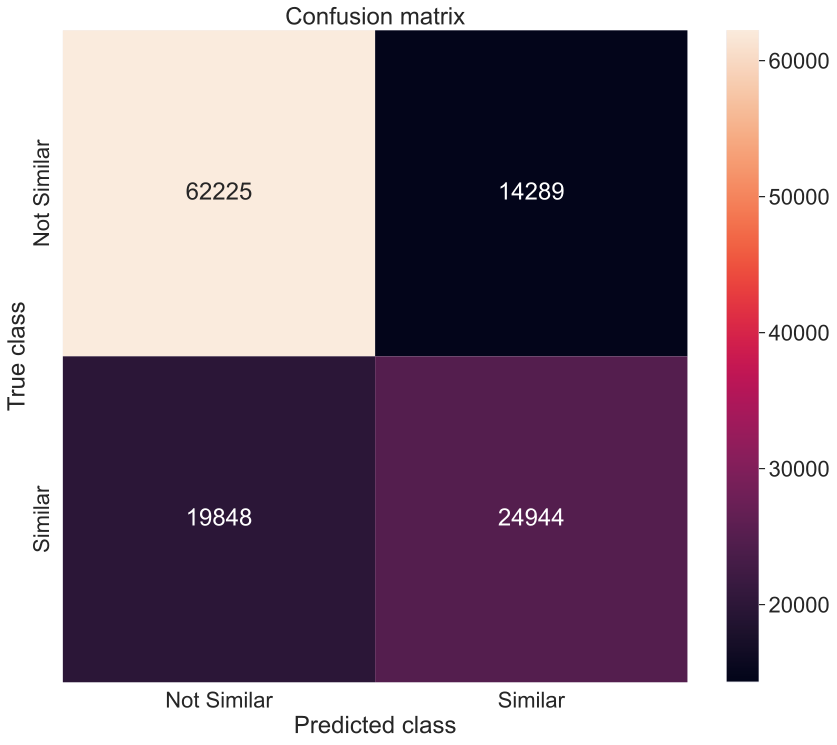

In [113]:
# heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix= confusion_matrix(y_test,y_predict)
sns.set(font_scale=2.0)
LABELS = ['Not Similar', 'Similar']
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
# plt.show()
plt.savefig('confusion_matrix_svm.svg')


In [114]:
accuracy_score(y_test, y_predict)

0.7185877038233888

<h1> XGBoost </h1>

In [115]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
import xgboost as xgb   

In [117]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4
d_train=xgb.DMatrix(x_train,label=y_train)
d_test=xgb.DMatrix(x_test,label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'valid')]
evals_result = {}
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10, evals_result=evals_result)
jb.dump(bst, './content/drive/My Drive/mlp/xgb.gz')
xgdmat = xgb.DMatrix(x_train,y_train)
y_predict = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, y_predict, eps=1e-15))

/Users/thanmaisahith/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.68681	valid-logloss:0.68687
[10]	train-logloss:0.63513	valid-logloss:0.63570
[20]	train-logloss:0.59785	valid-logloss:0.59884
[30]	train-logloss:0.56974	valid-logloss:0.57105
[40]	train-logloss:0.54842	valid-logloss:0.54997
[50]	train-logloss:0.53213	valid-logloss:0.53393
[60]	train-logloss:0.51896	valid-logloss:0.52097
[70]	train-logloss:0.50824	valid-logloss:0.51043
[80]	train-logloss:0.49911	valid-logloss:0.50146
[90]	train-logloss:0.49189	valid-logloss:0.49440
[100]	train-logloss:0.48625	valid-logloss:0.48889
[110]	train-logloss:0.48148	valid-logloss:0.48426
[120]	train-logloss:0.47761	valid-logloss:0.48048
[130]	train-logloss:0.47419	valid-logloss:0.47719
[140]	train-logloss:0.47147	valid-logloss:0.47456
[150]	train-logloss:0.46901	valid-logloss:0.47217
[160]	train-logloss:0.46669	valid-logloss:0.46993
[170]	train-logloss:0.46457	valid-logloss:0.46791
[180]	train-logloss:0.46273	valid-logloss:0.46618
[190]	train-logloss:0.46110	valid-logloss:0.46462
[200]	train

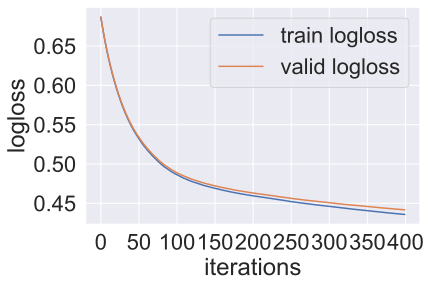

In [118]:
# plot evaluation results
train_logloss=evals_result['train']['logloss']
valid_logloss=evals_result['valid']['logloss']
plt.plot(train_logloss,label="train logloss")
plt.plot(valid_logloss,label="valid logloss")
plt.xlabel("iterations")
plt.ylabel("logloss")
# specify the scale of x-axis we want each unit to be 50
plt.xticks(np.arange(0, 450, 50))
plt.yticks(np.arange(0.45, 0.7, 0.05))
plt.legend()
# decrease the label font size
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['axes.labelsize'] = 12
plt.savefig('xgb-ll.svg')



In [119]:
y_predict=np.array(y_predict>0.5,dtype=int)
confusion_matrix(y_test,y_predict)

array([[60357, 16157],
       [11971, 32821]])

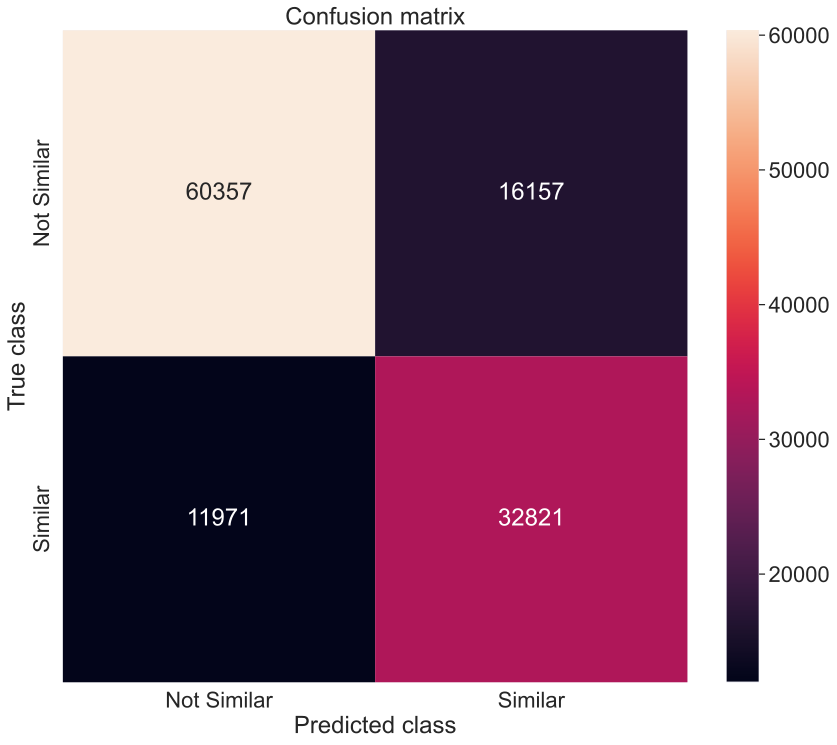

In [120]:
# heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix= confusion_matrix(y_test,y_predict)
sns.set(font_scale=2.0)
LABELS = ['Not Similar', 'Similar']
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
# plt.show()
plt.savefig('confusion_matrix_xgb.svg')

In [121]:
accuracy_score(y_test, y_predict)

0.7681235882808765